In [1]:
library(dplyr)
library(ggplot2)
library(tidyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#-----------------------------------------------------------
#* 与trans-eGene相比大多数cis-eGene都只受单个eQTL调控
#-----------------------------------------------------------
cis_eGene=data.frame(
    num=c(46620,6257,777,200),
    type=c(1,2,3,4),
    eGene=c('cis','cis','cis','cis')
)
trans_eGene=data.frame(
    num=c(9864,4116,868,685),
    type=c(1,2,3,4),
    eGene=c('trans','trans','trans','trans')
)
cis_eGene=cis_eGene %>% mutate(ratio=num/sum(num))
trans_eGene=trans_eGene %>% mutate(ratio=num/sum(num))

plotData=rbind(cis_eGene,trans_eGene)
plotData$type=factor(plotData$type)

In [3]:
sum(trans_eGene$num)

[1] 15533

png 
  2

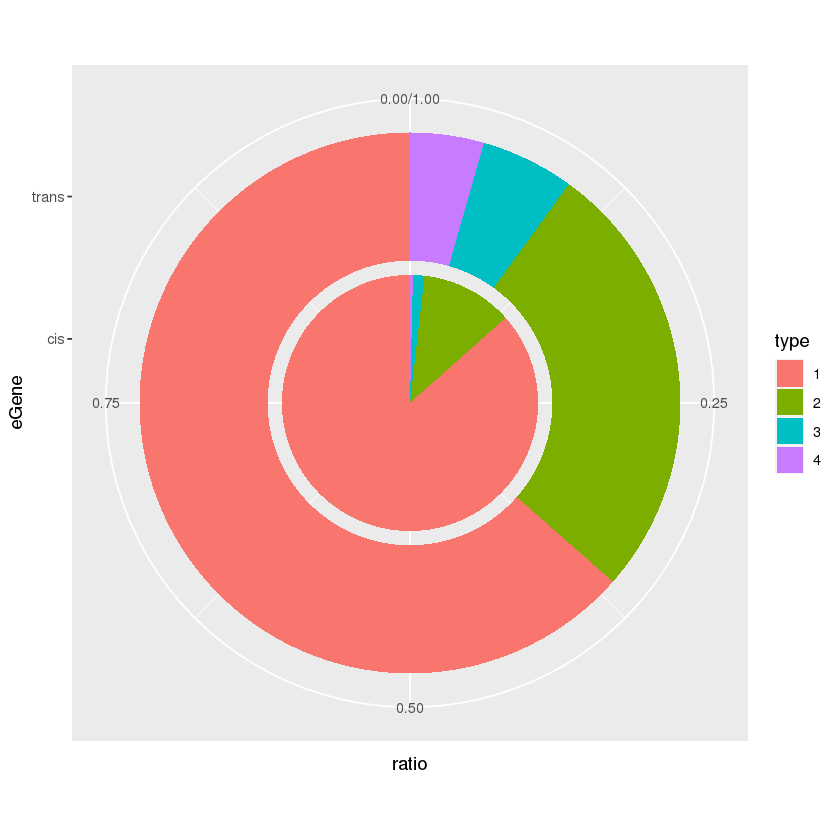

In [23]:
#* trans-eGene更多的基因存在多个eQTL调控
p=plotData %>% ggplot(
    aes(x = eGene, y = ratio, fill = type)
) +
    geom_bar(stat = "identity", position = "stack") +
    coord_polar(theta = "y")
pdf("cis_trans_QTLCount.pdf")
print(p)
dev.off()
p

In [24]:
#-----------------------------------------------------------
#* 与BiasN-Gene相比大多数Bias-eGene都受eQTL调控
#-----------------------------------------------------------
cis_eGene=data.frame(
    num=c(18035,19291),
    type=c('bias','bias'),
    eGene=c('eGene','noneGene')
)
trans_eGene=data.frame(
    num=c(6018,14903),
    type=c('noBias','noBias'),
    eGene=c('eGene','noneGene')
)
cis_eGene=cis_eGene %>% mutate(ratio=num/sum(num))
trans_eGene=trans_eGene %>% mutate(ratio=num/sum(num))

plotData=rbind(cis_eGene,trans_eGene)
plotData$type=factor(plotData$type)

In [18]:
plotData

num,type,eGene,ratio
<dbl>,<fct>,<fct>,<dbl>
18035,bias,eGene,0.4831753
19291,bias,noneGene,0.5168247
6018,noBias,eGene,0.2876536
14903,noBias,noneGene,0.7123464


png 
  2

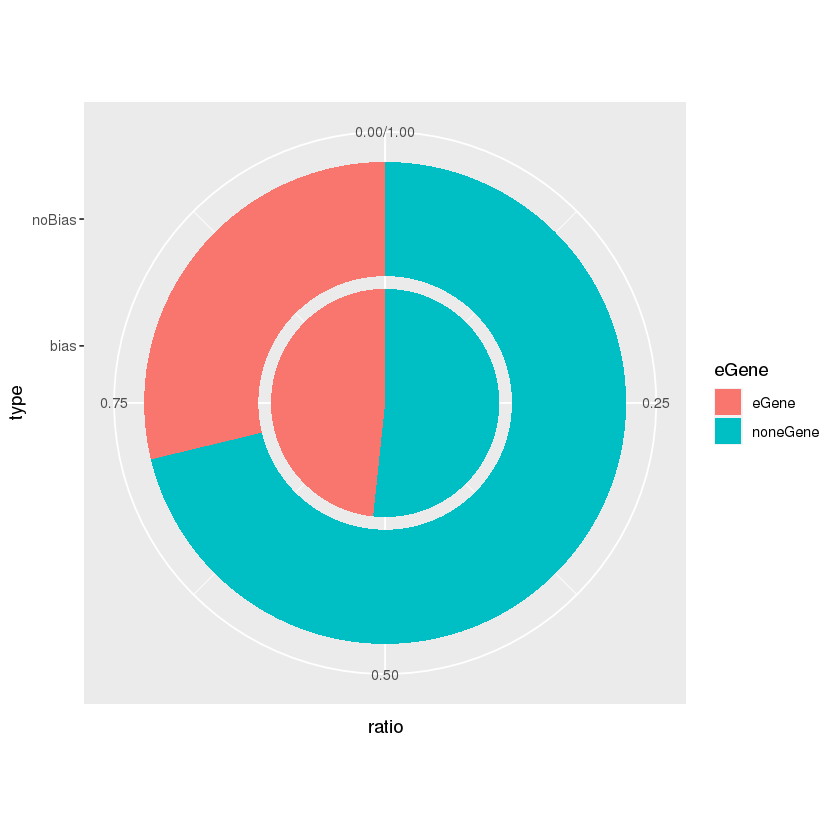

In [25]:
p <- plotData %>% ggplot(
    aes(x = type, y = ratio, fill = eGene)
) +
    geom_bar(stat = "identity", position = "stack") +
    coord_polar(theta = "y")
pdf("Bias_eQTL_count.pdf")
print(p)
dev.off()
p

In [63]:
#------------------------------------------------------------
#* 统计每个时期，每个eGene包含eQTL(cis和trans)的数目
#------------------------------------------------------------
All_eGene=read.table("All_cis_trans_eGene_eQTLCount.txt",header=F)
colnames(All_eGene)=c("stage","eGene",'eQTLCount')

In [57]:
#--------------------------------------------------------
#TODO: 每个时期中，每个基因平均受到多少个eQTL调控
#--------------------------------------------------------
mean_eQTLCount=All_eGene %>% group_by(stage) %>% summarise(meanCount=mean(eQTLCount))
mean_eQTLCount

stage,meanCount
<fct>,<dbl>
0DPA,1.362502
12DPA,1.528010
16DPA,1.332407
20DPA,1.315515
4DPA,1.382324
8DPA,1.366920


In [67]:
#* 超过4个的都统一的作为4个
geneIndependent=All_eGene %>%
    group_by(stage) %>%
    mutate(n = ifelse(eQTLCount > 4, 4, eQTLCount)) %>%
    count(n, name = "geneCount") %>%
    pivot_wider(
        id_cols = stage, names_from = n, values_from = geneCount
    )
colnames(geneIndependent)=c("stage",'rank1','rank2','rank3','rank4')
#* 每个时期对应的基因比例到底有多少
geneIndependent %>% mutate(totalGene=rank1+rank2+rank3+rank4) %>%
    mutate(
        ratio1=rank1/totalGene,
        ratio2=rank2/totalGene,
        ratio3=rank3/totalGene,
        ratio4=rank4/totalGene,
    ) %>% pivot_longer(
        cols=starts_with('ratio'),
        names_to=c("rankType"),
        values_to=c('ratio')
    ) %>% head()

stage,rank1,rank2,rank3,rank4,totalGene,rankType,ratio
<fct>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>
0DPA,8079,1843,453,287,10662,ratio1,0.75773776
0DPA,8079,1843,453,287,10662,ratio2,0.17285687
0DPA,8079,1843,453,287,10662,ratio3,0.04248734
0DPA,8079,1843,453,287,10662,ratio4,0.02691803
12DPA,8092,3234,864,484,12674,ratio1,0.63847246
12DPA,8092,3234,864,484,12674,ratio2,0.25516806


In [74]:
geneIndependent %>% mutate(totalGene=rank1+rank2+rank3+rank4) %>%
    mutate(
        ratio1=rank1/totalGene,
        ratio2=rank2/totalGene,
        ratio3=rank3/totalGene,
        ratio4=rank4/totalGene,
    ) %>% pivot_longer(
        cols=starts_with('ratio'),
        names_to=c("rankType"),
        values_to=c('ratio')
    )  %>% filter(rankType=='ratio1') %>% mutate(ratio2=1-ratio) 

stage,rank1,rank2,rank3,rank4,totalGene,rankType,ratio,ratio2
<fct>,<int>,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>
0DPA,8079,1843,453,287,10662,ratio1,0.7577378,0.2422622
12DPA,8092,3234,864,484,12674,ratio1,0.6384725,0.3615275
16DPA,7609,1482,360,266,9717,ratio1,0.7830606,0.2169394
20DPA,6863,1194,330,237,8624,ratio1,0.7958024,0.2041976
4DPA,7570,1730,456,314,10070,ratio1,0.7517378,0.2482622
8DPA,7998,1590,454,339,10381,ratio1,0.7704460,0.2295540


png 
  2

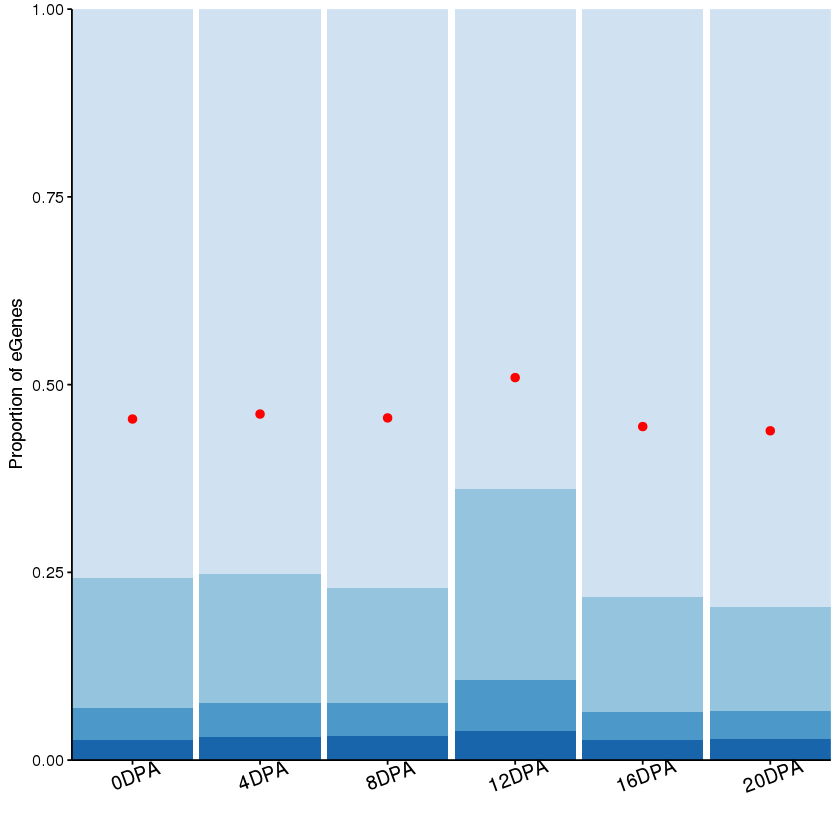

In [59]:
plotData <- geneIndependent %>%
    mutate(totalGene = rank1 + rank2 + rank3 + rank4) %>%
    mutate(
        ratio1 = rank1 / totalGene,
        ratio2 = rank2 / totalGene,
        ratio3 = rank3 / totalGene,
        ratio4 = rank4 / totalGene,
    ) %>%
    pivot_longer(
        cols = starts_with("ratio"),
        names_to = c("rankType"),
        values_to = c("ratio")
    )
plotData$stage <- factor(plotData$stage, levels = c("0DPA", "4DPA", "8DPA", "12DPA", "16DPA", "20DPA"))
p=plotData %>%
    ggplot(aes(x = stage, y = ratio, fill = rankType)) +
    geom_bar(
        stat = "identity",
        width = 0.95
    ) +
    geom_point(
        data=mean_eQTLCount,aes(x=stage,y=meanCount/3),inherit.aes = F,
        size=2,
        color='red'
        )+
    theme_classic() +
    theme(
        panel.background = element_blank(),
        axis.ticks.x = element_line(color = "black"),
        axis.ticks.y = element_line(color = "black"),
        axis.text.y = element_text(size = 10, color = "black"),
        axis.text.x = element_text(size = 12, color = "black", angle = 20),
        legend.position = "none"
    ) +
    scale_x_discrete(expand = c(-0.5, 0)) +
    scale_y_continuous(expand = c(0, 0)) +
    scale_fill_manual(
        values = c("#D0E1F1", "#95C4DE", "#4C98C9", "#1965AC")
    ) +
    ylab("Proportion of eGenes") +
    xlab("")
pdf("All_eGene_QTLCount.pdf",width = 4,height = 4)
print(p)
dev.off()
p

In [4]:
#-------------------------------------------------------------------------
# TODO: 绘制多个rank的eQTL距离eGene的distance比较
#-------------------------------------------------------------------------
All_rank_cis_eQTL <- read.table("All_cis_eQTL_rank_distance.txt", header = T)

In [6]:
All_rank_cis_eQTL %>% count(rank)

rank,n
<int>,<int>
1,53854
2,7234
3,977
4,419


png 
  2

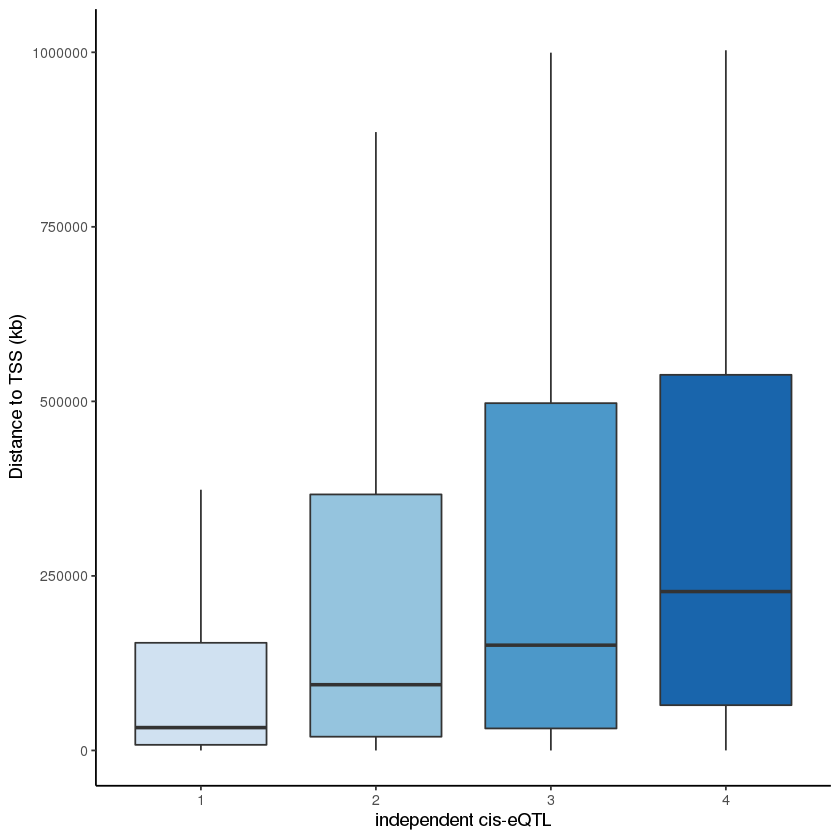

In [51]:
p <- All_rank_cis_eQTL %>% ggplot(aes(x = factor(rank), y = distance, fill = factor(rank))) +
    geom_boxplot(outlier.colour = NA) +
    theme_classic() +
    xlab("independent cis-eQTL") +
    ylab("Distance to TSS (kb)") +
    scale_fill_manual(
        values = c("#D0E1F1", "#95C4DE", "#4C98C9", "#1965AC")
    ) +
    theme(legend.position = "None")
pdf("All_rank_ciseQTL_distance.pdf")
print(p)
dev.off()
p

In [8]:
a=All_rank_cis_eQTL %>% filter(rank==3) 
b=All_rank_cis_eQTL %>% filter(rank==4) 

wilcox.test(
    a$distance,b$distance
)




	Wilcoxon rank sum test with continuity correction

data:  a$distance and b$distance
W = 181640, p-value = 0.0008452
alternative hypothesis: true location shift is not equal to 0
